In [1]:
%cd ..

/home/lab-admin/Code/vr-exoskeleton


/home/lab-admin/Code/vr-exoskeleton/venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# explore

In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from vr_exoskeleton import data_utils

In [3]:
# Colored text: https://stackoverflow.com/a/64020586/1559071

color2num = dict(
    gray=30,
    red=31,
    green=32,
    yellow=33,
    blue=34,
    magenta=35,
    cyan=36,
    white=37,
    crimson=38
)

def colorize(string, color, bold=False, highlight=False):
    attr = []
    num = color2num[color]
    if highlight:
        num += 10
    attr.append(str(num))
    if bold:
        attr.append('1')
    return '\x1b[%sm%s\x1b[0m' % (';'.join(attr), string)

## Open files

In [4]:
users, tasks, user_task_paths = data_utils.get_user_task_paths()
print(users[:5])
tasks

['User1', 'User2', 'User3', 'User4', 'User5']


['ArcSmoothPursuit',
 'LinearSmoothPursuit',
 'RapidVisualSearch',
 'RapidVisualSearchAvoidance']

In [5]:
with open(user_task_paths[users[0]][tasks[0]][0]) as fd:
    user0_task0_0_lines = [line.strip() for line in fd.readlines()]
print(len(user0_task0_0_lines))
for line in user0_task0_0_lines[:8]:
    print(line)

10802
time_stamp(ms),eye_in_head_left_x,eye_in_head_left_y,eye_in_head_left_z,eye_in_head_right_x,eye_in_head_right_y,eye_in_head_right_z,head_x,head_y,head_z
441447,-0.008895874,0.08401489,0.9964142,-0.01121521,0.0809021,0.9966583,0.02062806,0.2344575,0.9719075
441455,-0.008895874,0.08320618,0.9964905,-0.01086426,0.08082581,0.9966583,0.02052364,0.2352921,0.971708
441463,-0.008880615,0.08288574,0.9965057,-0.01095581,0.07977295,0.9967499,0.02054862,0.2363074,0.9714611
441471,-0.008895874,0.08195496,0.996582,-0.01092529,0.07943726,0.9967651,0.02048668,0.2375305,0.971164
441480,-0.008850098,0.08207703,0.996582,-0.01083374,0.07948303,0.9967651,0.02048668,0.2375305,0.971164
441488,-0.008850098,0.08207703,0.996582,-0.01176453,0.07951355,0.9967499,0.02044128,0.2388268,0.970847
441496,-0.008865356,0.0813446,0.9966431,-0.01174927,0.0788269,0.9968109,0.02035893,0.2400123,0.9705563


In [6]:
df_user0_task0_0 = pd.read_csv(user_task_paths[users[0]][tasks[0]][0])
print(len(df_user0_task0_0))
df_user0_task0_0.head()

10801


,time_stamp(ms),eye_in_head_left_x,eye_in_head_left_y,eye_in_head_left_z,eye_in_head_right_x,eye_in_head_right_y,eye_in_head_right_z,head_x,head_y,head_z
0,441447,-0.008896,0.084015,0.996414,-0.011215,0.080902,0.996658,0.020628,0.234458,0.971908
1,441455,-0.008896,0.083206,0.996490,-0.010864,0.080826,0.996658,0.020524,0.235292,0.971708
2,441463,-0.008881,0.082886,0.996506,-0.010956,0.079773,0.996750,0.020549,0.236307,0.971461
3,441471,-0.008896,0.081955,0.996582,-0.010925,0.079437,0.996765,0.020487,0.237531,0.971164
4,441480,-0.008850,0.082077,0.996582,-0.010834,0.079483,0.996765,0.020487,0.237531,0.971164


In [7]:
COL_TIME_STAMP = df_user0_task0_0.columns[0]
COL_EYE_L_X = df_user0_task0_0.columns[1]
COL_EYE_L_Y = df_user0_task0_0.columns[2]
COL_EYE_L_Z = df_user0_task0_0.columns[3]
COL_EYE_R_X = df_user0_task0_0.columns[4]
COL_EYE_R_Y = df_user0_task0_0.columns[5]
COL_EYE_R_Z = df_user0_task0_0.columns[6]
COL_HEAD_X = df_user0_task0_0.columns[7]
COL_HEAD_Y = df_user0_task0_0.columns[8]
COL_HEAD_Z = df_user0_task0_0.columns[9]

## Basic Stats

In [8]:
print(tasks[0])
df_user0_task0_0.describe()

ArcSmoothPursuit


,time_stamp(ms),eye_in_head_left_x,eye_in_head_left_y,eye_in_head_left_z,eye_in_head_right_x,eye_in_head_right_y,eye_in_head_right_z,head_x,head_y,head_z
count,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000
mean,486437.684566,0.063958,0.035829,0.944820,0.068720,0.045066,0.939738,0.133754,0.312787,0.749093
std,25979.148837,0.119069,0.130748,0.184874,0.120199,0.129147,0.195141,0.438118,0.328535,0.152583
min,441447.000000,-0.360886,-0.343018,0.000000,-0.383331,-0.396423,0.000000,-0.811693,-0.390750,0.429818
25%,463942.000000,0.000000,-0.039246,0.969940,0.000000,-0.027313,0.969345,-0.245685,0.136369,0.615868
50%,486438.000000,0.051453,0.019226,0.985306,0.056305,0.031921,0.985001,0.203632,0.332524,0.759155
75%,508933.000000,0.134308,0.117615,0.995560,0.144455,0.125061,0.994888,0.538184,0.566231,0.872404
max,531427.000000,0.466064,0.418167,0.999985,0.483841,0.439423,0.999985,0.828488,0.887138,0.999863


In [9]:
print(tasks[1])
df_user0_task1_0 = pd.read_csv(user_task_paths[users[0]][tasks[1]][0])
df_user0_task1_0.describe()

LinearSmoothPursuit


,time_stamp(ms),eye_in_head_left_x,eye_in_head_left_y,eye_in_head_left_z,eye_in_head_right_x,eye_in_head_right_y,eye_in_head_right_z,head_x,head_y,head_z
count,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000
mean,178474.807518,0.042147,-0.053470,0.938646,0.047102,-0.045979,0.933086,0.238317,-0.033659,0.775278
std,25978.996464,0.111108,0.200411,0.172491,0.112907,0.201004,0.185616,0.371593,0.433459,0.122799
min,133485.000000,-0.341721,-0.520203,0.000000,-0.378403,-0.482788,0.000000,-0.779199,-0.701496,0.524195
25%,155980.000000,-0.013351,-0.199677,0.953507,-0.009964,-0.189652,0.952255,-0.012614,-0.418054,0.674717
50%,178474.000000,0.049301,-0.084213,0.974960,0.057037,-0.070969,0.974060,0.375466,-0.115983,0.769912
75%,200971.000000,0.115921,0.108200,0.989197,0.121704,0.120102,0.989319,0.526421,0.372804,0.878646
max,223465.000000,0.435791,0.474380,0.999985,0.443329,0.492523,0.999985,0.795748,0.799980,0.999979


In [10]:
print(tasks[2])
df_user0_task2_0 = pd.read_csv(user_task_paths[users[0]][tasks[2]][0])
df_user0_task2_0.describe()

RapidVisualSearch


,time_stamp(ms),eye_in_head_left_x,eye_in_head_left_y,eye_in_head_left_z,eye_in_head_right_x,eye_in_head_right_y,eye_in_head_right_z,head_x,head_y,head_z
count,1.080100e+04,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000
mean,1.127150e+06,-0.027548,0.006897,0.956451,-0.023523,0.012952,0.947908,0.020371,0.002301,0.714362
std,2.597913e+04,0.155223,0.164853,0.127881,0.154002,0.160385,0.158128,0.548122,0.401621,0.166066
min,1.082159e+06,-0.641327,-0.511231,0.000000,-0.630035,-0.520935,0.000000,-0.909803,-0.688965,0.133600
25%,1.104654e+06,-0.107971,-0.106369,0.962158,-0.103699,-0.094467,0.962433,-0.485413,-0.379416,0.572670
50%,1.127149e+06,-0.023102,0.012299,0.981354,-0.017578,0.016235,0.981552,-0.025261,-0.002858,0.733259
75%,1.149645e+06,0.053177,0.139938,0.991791,0.056961,0.141419,0.992538,0.568478,0.351368,0.844032
max,1.172141e+06,0.582031,0.444550,0.999985,0.598267,0.440720,0.999985,0.933570,0.750379,0.999731


In [11]:
print(tasks[3])
df_user0_task3_0 = pd.read_csv(user_task_paths[users[0]][tasks[3]][0])
df_user0_task3_0.describe()

RapidVisualSearchAvoidance


,time_stamp(ms),eye_in_head_left_x,eye_in_head_left_y,eye_in_head_left_z,eye_in_head_right_x,eye_in_head_right_y,eye_in_head_right_z,head_x,head_y,head_z
count,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000
mean,814412.956208,0.013894,0.046526,0.938138,0.014818,0.057196,0.937141,0.107159,0.095749,0.736868
std,25979.093938,0.142437,0.165420,0.183763,0.142029,0.162270,0.186108,0.533932,0.362020,0.142384
min,769422.000000,-0.509094,-0.555557,0.000000,-0.517746,-0.585709,0.000000,-0.966968,-0.680869,0.248403
25%,791918.000000,-0.050522,-0.058212,0.960632,-0.044861,-0.038162,0.960907,-0.389865,-0.188042,0.622612
50%,814412.000000,0.011398,0.079788,0.983154,0.014709,0.087799,0.982269,0.264142,0.172848,0.748374
75%,836909.000000,0.076080,0.151032,0.992035,0.077835,0.164230,0.991974,0.617866,0.404179,0.848357
max,859404.000000,0.559708,0.472855,0.999969,0.554855,0.511841,0.999985,0.926262,0.833213,0.999839


### Frames

In [12]:
def print_user_task_table(item_printer, w_task=32):
    print('  User  ', end='')
    for task in tasks:
        print('|  {:>{w}}  '.format(task, w=w_task), end='')
    print()
    print('========', end='')
    for _ in tasks:
        print('+' + ('=' * (w_task + 4)), end='')
    print()
    for user in users:
        print(f'{user:>7} ', end='')
        for task in tasks:
            print('|  {}  '.format(item_printer(user, task)), end='')
        print()


user_task_frames = {user: {task: list() for task in tasks}
                    for user in users}
for user in users:
    for task in tasks:
        for trial in range(data_utils.N_TRIALS):
            df = pd.read_csv(user_task_paths[user][task][trial])
            user_task_frames[user][task].append(len(df))
print_user_task_table(lambda user_, task_: ' '.join('{:>10d}'.format(frames)
                                                    for frames in user_task_frames[user_][task_]))

  User  |                  ArcSmoothPursuit  |               LinearSmoothPursuit  |                 RapidVisualSearch  |        RapidVisualSearchAvoidance  
========+====================================+====================================+====================================+====================================
  User1 |       10801      10801      10801  |       10801      10801      10801  |       10801      10801      10801  |       10801      10801      10801  
  User2 |       10801      10801      10801  |       10801      10801      10801  |       10801      10801      10801  |       10801      10801      10801  
  User3 |       10801      10801      10801  |       10801      10801      10801  |       10801      10801      10801  |       10801      10801      10801  
  User4 |       10801      10801      10801  |       10801      10801      10801  |       10801      10801      10801  |       10801      10801      10801  
  User5 |       10801      10801      10801  |       10801

### Histograms

Do we see any obvious skew or anomalies for the first user, task, and trial?

In [13]:
def plot_hist(df, bins=128):
    _, axs = plt.subplots(3, 3, figsize=(12, 8.1))
    row_cols = [[COL_EYE_L_X, COL_EYE_R_X, COL_HEAD_X],
                [COL_EYE_L_Y, COL_EYE_R_Y, COL_HEAD_Y],
                [COL_EYE_L_Z, COL_EYE_R_Z, COL_HEAD_Z]]
    for i, cols in enumerate(row_cols):
        for j, col in enumerate(cols):
            axs[i][j].hist(df[col], bins=bins)
            axs[i][j].set_title(col)
    plt.tight_layout()
    plt.show()

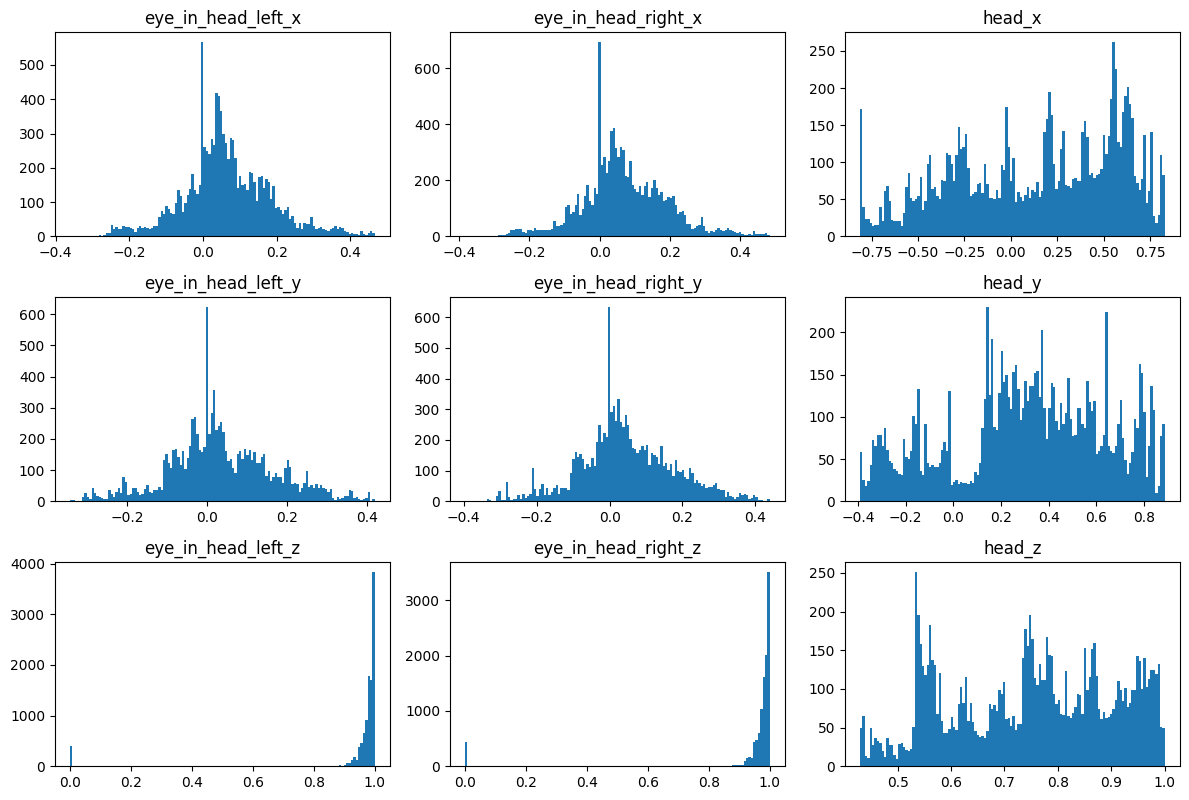

In [14]:
plot_hist(df_user0_task0_0)

The `z` component of both eye gazes obviously has its mean centered around `1.0`, but a small anomalous spike is present at `0.0`. The `x` and `y` components seem to have spikes at `0.0` as well, although `0.0` appears to be a valid value.

## Blinking 😑

Let's check the left and right eyes' minimum `z` component for all users, all tasks, and all trials.

In [15]:
def str_highlight_zero(x):
    s = f'{x:.1f}'
    return s if x > 0.1 else colorize(s, color='red')


user_task_z_pair_mins = {user: {task: list() for task in tasks}
                         for user in users}
for user in users:
    for task in tasks:
        for trial in range(data_utils.N_TRIALS):
            df = pd.read_csv(user_task_paths[user][task][trial])
            user_task_z_pair_mins[user][task].append((df[COL_EYE_L_Z].min(), df[COL_EYE_R_Z].min()))
print_user_task_table(lambda user_, task_: ' '.join('({}, {})'.format(str_highlight_zero(pair[0]), str_highlight_zero(pair[1]))
                                                    for pair in user_task_z_pair_mins[user_][task_]))

  User  |                  ArcSmoothPursuit  |               LinearSmoothPursuit  |                 RapidVisualSearch  |        RapidVisualSearchAvoidance  
========+====================================+====================================+====================================+====================================
  User1 |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  
  User2 |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  
  User3 |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  
  User4 |  (0.0, 0.0) (0.0, 0.0) (0.9, 0.9)  |  (0.0, 0.0) (0.8, 0.8) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  
  User5 |  (0.8, 0.9) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0)

We have to be careful because it seems that sometimes only one eye blinks throughout a given trial. This implies that not all eye blinks are necessarily simultaneous. 😉

First, let's check whether or not `z == 0` is a perfect discriminator of a closed eye. Check that every `x` and `y` that is paired with a zero-valued `z` is also zero.

In [16]:
is_z_perfect = True
for user in users:
    for task in tasks:
        for trial in range(data_utils.N_TRIALS):
            df = pd.read_csv(user_task_paths[user][task][trial])
            df_z0_left = df[df[COL_EYE_L_Z] == 0.0]
            for _, row in df_z0_left.iterrows():
                if row[COL_EYE_L_X] != 0.0 or row[COL_EYE_L_Y] != 0.0:
                    print(row)
                    is_z_perfect = False
            df_z0_right = df[df[COL_EYE_R_Z] == 0.0]
            for _, row in df_z0_right.iterrows():
                if row[COL_EYE_R_X] != 0.0 or row[COL_EYE_R_Y] != 0.0:
                    print(row)
                    is_z_perfect = False
is_z_perfect

True

### Frequency

Let's count how often each user blinks or winks for each trial.

In [17]:
user_task_trial_intervals = {user: {task: list() for task in tasks}
                             for user in users}
for user in users:
    for task in tasks:
        for trial in range(data_utils.N_TRIALS):
            df = pd.read_csv(user_task_paths[user][task][trial])
            df_blink = df[(df[COL_EYE_L_Z] == 0.0) | (df[COL_EYE_R_Z] == 0.0)]
            trial_intervals = list()
            if len(df_blink) > 0:  # User may not have blinked during a trial.
                start_blink = df_blink.index[0]
                for i in range(1, len(df_blink.index)):
                    if df_blink.index[i - 1] != df_blink.index[i] - 1:
                        trial_intervals.append((start_blink, df_blink.index[i - 1]))
                        start_blink = df_blink.index[i]
                trial_intervals.append((start_blink, df_blink.index[-1]))
            user_task_trial_intervals[user][task].append(trial_intervals)

print('TOTAL NUMBER OF BLINKING FRAMES (OUT OF {:d})'.format(len(df_user0_task0_0)))
print_user_task_table(lambda user_, task_: ' '.join('{:>10d}'.format(sum(end + 1 - start for start, end in trial_intervals))
                                                    for trial_intervals in user_task_trial_intervals[user_][task_]))

TOTAL NUMBER OF BLINKING FRAMES (OUT OF 10801)
  User  |                  ArcSmoothPursuit  |               LinearSmoothPursuit  |                 RapidVisualSearch  |        RapidVisualSearchAvoidance  
========+====================================+====================================+====================================+====================================
  User1 |         460        746        441  |         416        532        500  |         298        383        641  |         461        634        545  
  User2 |          75        312        218  |         233        136         88  |         100         99         48  |         111         16        109  
  User3 |         107        132        144  |         225        161        224  |        1582        773        948  |         508        723        537  
  User4 |          14         28          0  |         120          0         14  |          25         53        103  |         165         45         87  
  User5 |  

It's not surprising that some users blink more than others. It seems like we can drop the blinked rows.

### Duration

During a meeting Ian asked, "how _long_ are the blinks?"

In [18]:
def blink_duration_mean_str(trial_intervals_):
    if len(trial_intervals_) == 0:
        return '         -'
    f_str_ = '{:.4f}'.format(sum(end_ + 1 - start_ for start_, end_ in trial_intervals_) / len(trial_intervals_))
    return '{:>10}'.format(f_str_)


print('AVERAGE DURATION OF BLINK')
print_user_task_table(lambda user_, task_: ' '.join(blink_duration_mean_str(trial_intervals)
                                                    for trial_intervals in user_task_trial_intervals[user_][task_]))

AVERAGE DURATION OF BLINK
  User  |                  ArcSmoothPursuit  |               LinearSmoothPursuit  |                 RapidVisualSearch  |        RapidVisualSearchAvoidance  
========+====================================+====================================+====================================+====================================
  User1 |     19.1667    19.6316    22.0500  |     18.9091    22.1667    20.8333  |     13.5455    12.7667    14.5682  |     15.8966    15.8500    16.5152  
  User2 |     18.7500    20.8000    19.8182  |     23.3000    22.6667    17.6000  |      9.0909    14.1429    12.0000  |     13.8750     8.0000     9.9091  
  User3 |     17.8333    18.8571    18.0000  |     16.0714    20.1250    20.3636  |      8.9886     6.7217     7.4062  |      9.7692     9.2692     8.0149  
  User4 |      7.0000    14.0000          -  |     24.0000          -    14.0000  |      5.0000     3.1176     4.9048  |      6.6000     3.4615     4.3500  
  User5 |           -    23.1818

Finally, how many _times_ did users blink?

In [19]:
print('NUMBER OF CONTIGUOUS BLINKING SEGMENTS')
print_user_task_table(lambda user_, task_: ' '.join('{:>10d}'.format(len(trial_intervals_))
                                                                     for trial_intervals_ in user_task_trial_intervals[user_][task_]))

NUMBER OF CONTIGUOUS BLINKING SEGMENTS
  User  |                  ArcSmoothPursuit  |               LinearSmoothPursuit  |                 RapidVisualSearch  |        RapidVisualSearchAvoidance  
========+====================================+====================================+====================================+====================================
  User1 |          24         38         20  |          22         24         24  |          22         30         44  |          29         40         33  
  User2 |           4         15         11  |          10          6          5  |          11          7          4  |           8          2         11  
  User3 |           6          7          8  |          14          8         11  |         176        115        128  |          52         78         67  
  User4 |           2          2          0  |           5          0          1  |           5         17         21  |          25         13         20  
  User5 |          